In [1]:
import osmnx as ox
import networkx as nx
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Enable high resolution plots
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

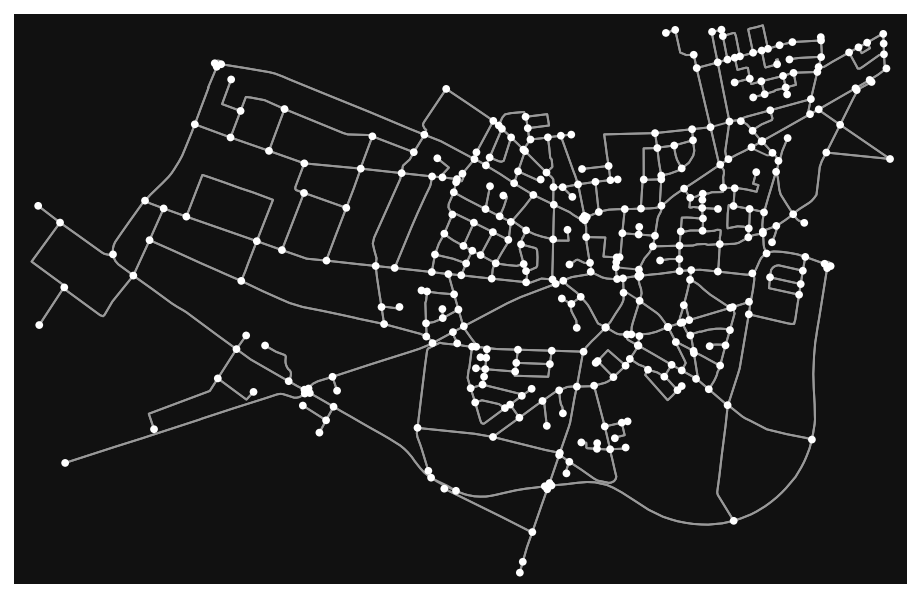

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [2]:
# Defining the map boundaries 
north, east, south, west = 52.8627, 7.6273, 52.8364, 7.7048    
# Downloading the map as a graph object 
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')  

G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
# Plotting the map graph 
ox.plot_graph(G)

In [3]:
#hinzufügen fehlender Straßen
#G.add_edge(1317202421,530065860)
#G.add_edge(530065860,1317202421)

"""
1=530065860
2=1317202421
3=530272382
4=530272389
5=1
"""
G.remove_edge(530272382,530272389)
G.remove_edge(530272389,530272382)

G.add_node(1)
G.nodes[1]["x"] = 7.675845 
G.nodes[1]["y"] = 52.857754
#2-5
G.add_edge(1317202421,1)
G.edges[1317202421,1,0].update({'osmid': 42472843, 'name': 'Hilligenweg', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 175.143, 'speed_kph': 50.0, 'travel_time': 12.6})
#5-2
G.add_edge(1,1317202421)
G.edges[1,1317202421,0].update({'osmid': 42472843, 'name': 'Hilligenweg', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 175.143, 'speed_kph': 50.0, 'travel_time': 12.6})
#4-5
G.add_edge(530272389,1)
G.edges[530272389,1,0].update({'osmid': 42472843, 'name': 'Hilligenweg', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 269.28, 'speed_kph': 50.0, 'travel_time': 19.4})
#5-4
G.add_edge(1,530272389)
G.edges[1,530272389,0].update({'osmid': 42472843, 'name': 'Hilligenweg', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 269.28, 'speed_kph': 50.0, 'travel_time': 19.4})
#5-3
G.add_edge(1,530272382)
G.edges[1,530272382,0].update({'osmid': 42472843, 'name': 'Taubenweg', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 162.16, 'speed_kph': 50.0, 'travel_time': 11.7})
#3-5
G.add_edge(530272382,1)
G.edges[530272382,1,0].update({'osmid': 42472843, 'name': 'Taubenweg', 'highway': 'residential', 'maxspeed': '50', 'oneway': False, 'length': 162.16, 'speed_kph': 50.0, 'travel_time': 11.7})


In [ ]:
#G = ox.graph_from_place('Werlte, Germany', network_type='drive')
#ox.plot_graph(G)

In [4]:
nodeCoords = {}
for node in list(G.nodes()):
    nodeCoords[node] = (G.nodes[node]["y"],G.nodes[node]["x"])
    
nodeCoords[1]

(52.857754, 7.675845)

In [5]:
posEdge = {}
for edge in list(G.edges()):
    posEdge[edge] = 0
 
edgeList = []
for edge in list(G.edges()):
    edgeList.append([edge[0],edge[1],posEdge[edge]])
    
edgeList
    

[[303151204, 530272330, 0],
 [303151204, 365272324, 0],
 [303151204, 530272327, 0],
 [303550386, 530272371, 0],
 [303550386, 303596858, 0],
 [303550386, 365269236, 0],
 [303550407, 530272409, 0],
 [303550407, 303550419, 0],
 [303550407, 530272359, 0],
 [303550419, 530272371, 0],
 [303550419, 303550407, 0],
 [303550419, 530272366, 0],
 [303550432, 303550516, 0],
 [303550432, 530272419, 0],
 [303550432, 530272461, 0],
 [303550479, 530272406, 0],
 [303550479, 303550491, 0],
 [303550479, 530272427, 0],
 [303550489, 306135499, 0],
 [303550489, 306135498, 0],
 [303550489, 530272496, 0],
 [303550491, 530272434, 0],
 [303550491, 303550479, 0],
 [303550491, 303596856, 0],
 [303550516, 530272404, 0],
 [303550516, 303550432, 0],
 [303550516, 530272406, 0],
 [303596856, 530272385, 0],
 [303596856, 530272404, 0],
 [303596856, 303550491, 0],
 [303596858, 4430477693, 0],
 [303596858, 530272326, 0],
 [303596858, 303550386, 0],
 [304550488, 365272356, 0],
 [304550488, 304550497, 0],
 [304550497, 535125

In [21]:
def nearestNode(y,x):
    distance = 10**10
    nearestNode = 0
    
    for node in nodeCoords:
        if((nodeCoords[node][0]-y)**2+(nodeCoords[node][1]-x)**2 <= distance):
            distance = (nodeCoords[node][0]-y)**2+(nodeCoords[node][1]-x)**2
            nearestNode = node
            
    return nearestNode

nearestNode(52.857133, 7.687431)

530272404

In [23]:
G.edges[530272404,530272419,0]
G.edges[530272419,530272404,0]

KeyError: 530272404

In [7]:
def adjWays(node):
    print(G.adj[node])
    adjWays = []
    for adjNode in list(G.adj[node]):
        pass#print(G.edges[node,adjNode,0])
        
adjWays(530065877)
#adjWays(530065860)

{530065870: {0: {'osmid': [42458393, 42458390], 'name': ['Rostocker Straße', 'Königsberger Straße'], 'highway': 'residential', 'oneway': False, 'length': 195.02300000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001272CF78DF0>, 'speed_kph': 40.2, 'travel_time': 17.5}}, 530065872: {0: {'osmid': 42458390, 'name': 'Rostocker Straße', 'highway': 'residential', 'oneway': False, 'length': 60.877, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001272CF786A0>, 'speed_kph': 40.2, 'travel_time': 5.5}, 1: {'osmid': 42458391, 'name': 'Heilsberger Straße', 'highway': 'residential', 'oneway': False, 'length': 286.483, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001272CF78FA0>, 'speed_kph': 40.2, 'travel_time': 25.7}}}


In [9]:
node = 365272324
for edge in list(G.adj[node]):
    print(G.edges[node,edge,0])

{'osmid': 27737154, 'name': 'Kirchstraße', 'highway': 'residential', 'oneway': False, 'length': 142.928, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001272D07E640>, 'speed_kph': 40.2, 'travel_time': 12.8}
{'osmid': 27737154, 'name': 'Kirchstraße', 'highway': 'residential', 'oneway': False, 'length': 27.273, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001272D07E7C0>, 'speed_kph': 40.2, 'travel_time': 2.4}
{'osmid': 32488107, 'oneway': True, 'name': 'Gartenstraße', 'highway': 'residential', 'length': 121.631, 'geometry': <shapely.geometry.linestring.LineString object at 0x000001272D07E430>, 'speed_kph': 40.2, 'travel_time': 10.9}


In [12]:
def findNamenlos():
    namenlos = []
    for edge in edgeList:
        try:
            if(edge["name"]):
                pass
        except:
            try:
                if(edge["junction"]):
                    pass
            except:
                namenlos.append(edge[:2])
    return namenlos

findNamenlos()

[[303151204, 530272330],
 [303151204, 365272324],
 [303151204, 530272327],
 [303550386, 530272371],
 [303550386, 303596858],
 [303550386, 365269236],
 [303550407, 530272409],
 [303550407, 303550419],
 [303550407, 530272359],
 [303550419, 530272371],
 [303550419, 303550407],
 [303550419, 530272366],
 [303550432, 303550516],
 [303550432, 530272419],
 [303550432, 530272461],
 [303550479, 530272406],
 [303550479, 303550491],
 [303550479, 530272427],
 [303550489, 306135499],
 [303550489, 306135498],
 [303550489, 530272496],
 [303550491, 530272434],
 [303550491, 303550479],
 [303550491, 303596856],
 [303550516, 530272404],
 [303550516, 303550432],
 [303550516, 530272406],
 [303596856, 530272385],
 [303596856, 530272404],
 [303596856, 303550491],
 [303596858, 4430477693],
 [303596858, 530272326],
 [303596858, 303550386],
 [304550488, 365272356],
 [304550488, 304550497],
 [304550497, 535125306],
 [304550497, 304550511],
 [304550508, 530065840],
 [304550508, 304550488],
 [304550511, 530272318],

In [11]:
#Fix der namenlosen Straßen
G.edges[349295294, 4430457545,0]["name"] = "Am Bürgerpark"
G.edges[4430457545, 349295294,0]["name"] = "Am Bürgerpark"
G.edges[365272355, 2054330902,0]["name"] = "Africa SkyHotel"
G.edges[2054330902, 365272355,0]["name"] = "Africa SkyHotel"
G.edges[530066154, 2368148435,0]["name"] = "Kasernenstraße"
G.edges[2368148435, 530066154,0]["name"] = "Kasernenstraße"
G.edges[530259946, 2072588285,0]["name"] = "Hinterm Fleer"
G.edges[2072588285, 530259946,0]["name"] = "Hinterm Fleer"
G.edges[530272328, 530272327,0]["name"] = "Goethestraße"
G.edges[530272327, 530272328,0]["name"] = "Goethestraße"
G.edges[530272429, 2072551907,0]["name"] = "Fliederweg"
G.edges[2072551907, 530272429,0]["name"] = "Fliederweg"

#neues Baugebiet (evt. fixen)
G.edges[8165073949, 8165073948,0]["name"] = "Spartaweg"
G.edges[8165073948, 8165073949,0]["name"] = "Spartaweg"
G.edges[8165073949, 8165073951,0]["name"] = "Spartaweg"
G.edges[8165073951, 8165073949,0]["name"] = "Spartaweg"
G.edges[8165073950, 8165073951,0]["name"] = "Spartaweg"
G.edges[8165073951, 8165073950,0]["name"] = "Spartaweg"
G.edges[8165073951, 8165073952,0]["name"] = "Spartaweg"
G.edges[8165073952, 8165073951,0]["name"] = "Spartaweg"



fehlendeGeometry = []
for edge in edgeList:
    try:
        list(G.edges[edge]["geometry"].xy[0])
    except:
        fehlendeGeometry.append(edge)
        
#fehlendeGeometry
for edge in fehlendeGeometry:
    G.edges[edge]["geometry"] = LineString([(nodeCoords[edge[0]][1],nodeCoords[edge[0]][0]),(nodeCoords[edge[1]][1],nodeCoords[edge[1]][0])])




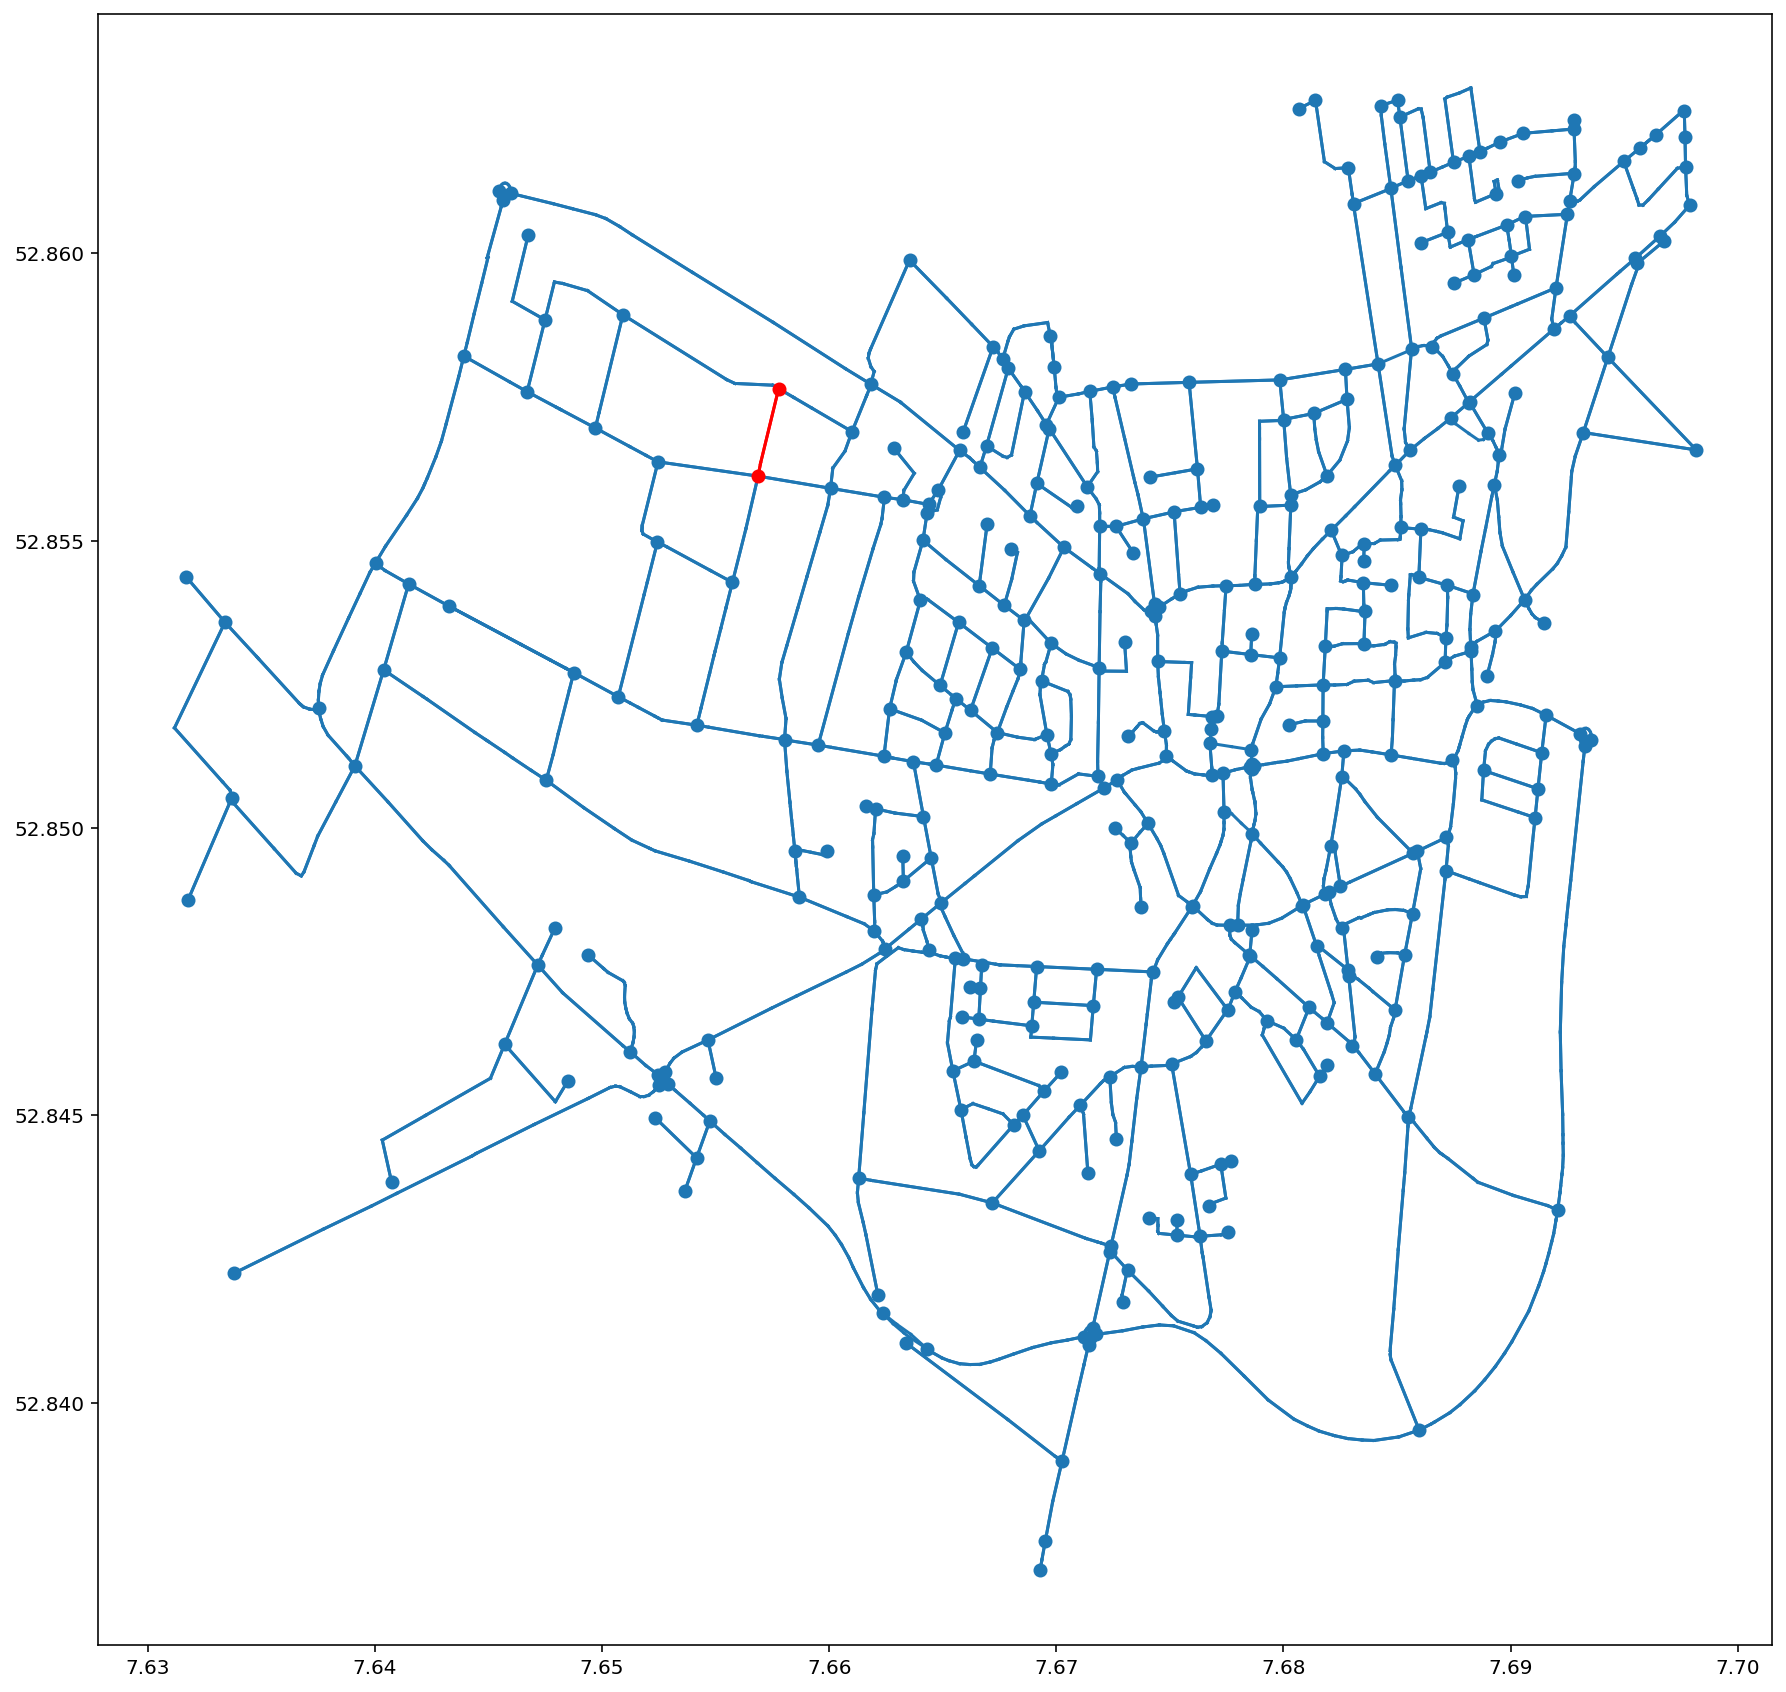

In [18]:
def plotStraße(node1,node2):
    xCoordNodes = []
    yCoordNodes = []
    for node in list(G.nodes()):
        if(node != node1 and node != node2):
            xCoordNodes.append(nodeCoords[node][1])
            yCoordNodes.append(nodeCoords[node][0])
    fig, ax = plt.subplots()
    plt.scatter(xCoordNodes,yCoordNodes,zorder=2)
    plt.scatter([nodeCoords[node1][1],nodeCoords[node2][1]],[nodeCoords[node1][0],nodeCoords[node2][0]],zorder=2,color="red")
    
    for edge in edgeList:
        if(edge[0] == node1 and edge[1] == node2 or edge[0] == node2 and edge[1] == node1):
            try:
                #print(G.edges[edge]["geometry"])
                xList = list(G.edges[edge]["geometry"].xy[0])
                yList = list(G.edges[edge]["geometry"].xy[1])
                for i in range(len(xList)-1):
                    #print([xList[i],yList[i]],[xList[i+1],yList[i+1]])
                    plt.plot([xList[i],xList[i+1]],[yList[i],yList[i+1]],zorder=1,c='red')
            except:
                pass
        else:
            try:
                xList = list(G.edges[edge]["geometry"].xy[0])
                yList = list(G.edges[edge]["geometry"].xy[1])
                for i in range(len(xList)-1):
                    #print([xList[i],yList[i]],[xList[i+1],yList[i+1]])
                    plt.plot([xList[i],xList[i+1]],[yList[i],yList[i+1]],zorder=1,c='C0')
            except:
                pass
        
    #print(type(G.edges[303151204,530272330,0]['geometry'])== "<class 'shapely.geometry.linestring.LineString'>")
    #print(list(G.edges()))
    #print(FehlerPlotten)
    fig.set_size_inches(15,15)
    plt.show()
    
    
plotStraße(530066122,530066118)
    

In [ ]:
# define origin and desination locations
origin_point = (52.857662, 7.672494)
destination_point = (52.857827, 7.679852)

# get the nearest nodes to the locations
origin_node = ox.get_nearest_node(G, origin_point)
destination_node = ox.get_nearest_node(G, destination_point)

# printing the closest node id to origin and destination points
origin_node, destination_node

In [ ]:
# Finding the optimal path
route = nx.shortest_path(G, origin_node, destination_node, weight = 'length')
route

In [ ]:
route = [530272328,530272327,]

In [ ]:
# getting coordinates of the nodes

# we will store the longitudes and latitudes in following list
long = []
lat = []

for i in route:
    point = G.nodes[i]
    long.append(point['x'])
    lat.append(point['y'])

In [ ]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))

    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))

    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))

    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)

    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                     mapbox = {
                         'center': {'lat': lat_center, 'lon': long_center},
                         'zoom': 13})

    fig.show()

In [ ]:
plot_path(lat, long, origin_point, destination_point)

In [ ]:
def node_list_to_path(G, node_list):
    """
    Given a list of nodes, return a list of lines that together follow the path
    defined by the list of nodes.
    Parameters
    ----------
    G : networkx multidigraph
    route : list
        the route as a list of nodes
    Returns
    -------
    lines : list of lines given as pairs ( (x_start, y_start), (x_stop, y_stop) )
    """
    edge_nodes = list(zip(node_list[:-1], node_list[1:]))
    lines = []
    for u, v in edge_nodes:
        # if there are parallel edges, select the shortest in length
        data = min(G.get_edge_data(u, v).values(), key=lambda x: x['length'])

        # if it has a geometry attribute (ie, a list of line segments)
        if 'geometry' in data:
            # add them to the list of lines to plot
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            # if it doesn't have a geometry attribute, the edge is a straight
            # line from node to node
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
    return lines

In [ ]:
# getting the list of coordinates from the path (which is a list of nodes)
lines = node_list_to_path(G, route)

long2 = []
lat2 = []

for i in range(len(lines)):
    z = list(lines[i])
    l1 = list(list(zip(*z))[0])
    l2 = list(list(zip(*z))[1])
    for j in range(len(l1)):
        long2.append(l1[j])
        lat2.append(l2[j])

In [ ]:
plot_path(lat2, long2, origin_point, destination_point)